In [ ]:
pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor

In [ ]:
p = Augmentor.Pipeline("/content/drive/MyDrive/Project/Wheat Disease", output_directory="/content/drive/MyDrive/Project/output")

Initialised with 238 image(s) found.
Output directory set to /content/drive/MyDrive/Project/output.

In [ ]:
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(500)

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7F55E44F03D0>: 100%|██████████| 500/500 [00:09<00:00, 52.07 Samples/s]


In [ ]:
import pathlib
import tensorflow as tf
data_dir = pathlib.Path('/content/drive/MyDrive/Project/output')
img_height=224
img_width=224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=8)

Found 3500 files belonging to 4 classes.
Using 2800 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=8)

Found 3500 files belonging to 4 classes.
Using 700 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
import numpy as np
normalized_ds = train_ds. map (lambda x, y: (normalization_layer(x), y) )
image_batch, labels_batch = next(iter (normalized_ds))
first_image = image_batch[0]
print(np.min(first_image) , np.max(first_image))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.0 1.0


In [ ]:
AUTOTUNE = tf.data. AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout, Conv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model = VGG19(
                     input_shape=(224, 224, 3),
                     weights='imagenet',
                     include_top=False)

for layer in base_model.layers[:10]:
     layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation= 'softmax')(x)
model1 = Model (inputs=base_model.inputs, outputs=predictions)


80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model = MobileNetV2(
                     input_shape=(224, 224, 3),
                     weights='imagenet',
                     include_top=False)

for layer in base_model.layers[:10]:
     layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation= 'softmax')(x)
model2 = Model (inputs=base_model.inputs, outputs=predictions)


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model = InceptionV3(
                     input_shape=(224, 224, 3),
                     weights='imagenet',
                     include_top=False)

for layer in base_model.layers[:10]:
     layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation= 'softmax')(x)
model3 = Model (inputs=base_model.inputs, outputs=predictions)


87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_filepath = "/content/drive/MyDrive/Project/model-{epoch:02d}-{val_accuracy:4f}.h5"
checkpoint = ModelCheckpoint(
filepath = model_filepath,
monitor = 'val_accuracy',
mode = 'max',
save_best_only = True,
verbose = 1
)

In [ ]:
model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])


In [ ]:
model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])


In [ ]:
model3.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])


In [ ]:
history1=model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5, callbacks=[checkpoint])

Epoch 1/5
350/350 [==============================] - ETA: 0s - loss: 1.7468 - accuracy: 0.3371
Epoch 1: val_accuracy improved from -inf to 0.36714, saving model to /content/drive/MyDrive/Project/model-01-0.367143.h5
350/350 [==============================] - 569s 409ms/step - loss: 1.7468 - accuracy: 0.3371 - val_loss: 1.3468 - val_accuracy: 0.3671
Epoch 2/5
350/350 [==============================] - ETA: 0s - loss: 1.8266 - accuracy: 0.3389
Epoch 2: val_accuracy did not improve from 0.36714
350/350 [==============================] - 46s 130ms/step - loss: 1.8266 - accuracy: 0.3389 - val_loss: 1.3484 - val_accuracy: 0.3671
Epoch 3/5
350/350 [==============================] - ETA: 0s - loss: 1.3550 - accuracy: 0.3482
Epoch 3: val_accuracy did not improve from 0.36714
350/350 [==============================] - 44s 126ms/step - loss: 1.3550 - accuracy: 0.3482 - val_loss: 1.3480 - val_accuracy: 0.3671
Epoch 4/5
350/350 [==============================] - ETA: 0s - loss: 1.3552 - accuracy: 0

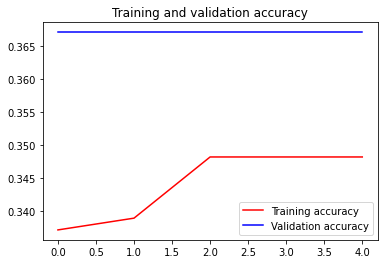

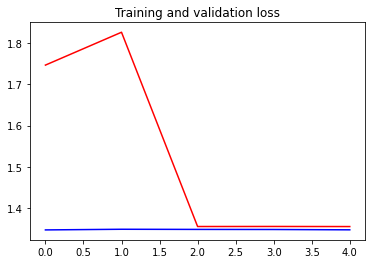

In [ ]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1. history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation accuracy')
plt. title('Training and validation accuracy')
plt. legend()
plt. figure()

plt.plot(epochs, loss, 'r', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation Loss')
plt.title('Training and validation loss')
plt. legend
plt.show()


In [ ]:
history2=model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5, callbacks=[checkpoint])

Epoch 1/5
349/350 [============================>.] - ETA: 0s - loss: 0.7999 - accuracy: 0.7120
Epoch 1: val_accuracy improved from 0.36714 to 0.38429, saving model to /content/drive/MyDrive/Project/model-01-0.384286.h5
350/350 [==============================] - 44s 50ms/step - loss: 0.7992 - accuracy: 0.7121 - val_loss: 6.4820 - val_accuracy: 0.3843
Epoch 2/5
350/350 [==============================] - ETA: 0s - loss: 0.4483 - accuracy: 0.8504
Epoch 2: val_accuracy improved from 0.38429 to 0.41286, saving model to /content/drive/MyDrive/Project/model-02-0.412857.h5
350/350 [==============================] - 16s 47ms/step - loss: 0.4483 - accuracy: 0.8504 - val_loss: 8.4397 - val_accuracy: 0.4129
Epoch 3/5
349/350 [============================>.] - ETA: 0s - loss: 0.2848 - accuracy: 0.9140
Epoch 3: val_accuracy improved from 0.41286 to 0.48429, saving model to /content/drive/MyDrive/Project/model-03-0.484286.h5
350/350 [==============================] - 16s 47ms/step - loss: 0.2842 - acc

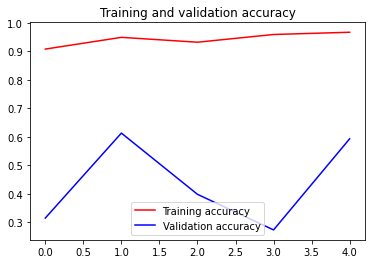

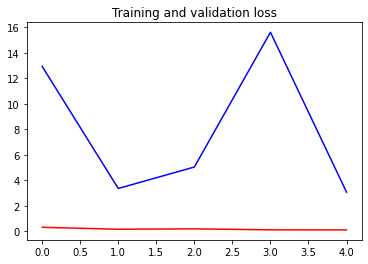

In [ ]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation accuracy')
plt. title('Training and validation accuracy')
plt. legend()
plt. figure()

plt.plot(epochs, loss, 'r', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation Loss')
plt.title('Training and validation loss')
plt. legend
plt.show()


In [ ]:
history3=model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5, callbacks=[checkpoint])

Epoch 1/5
300/300 [==============================] - ETA: 0s - loss: 1.2433 - accuracy: 0.4554
Epoch 1: val_accuracy did not improve from 0.52500
300/300 [==============================] - 61s 89ms/step - loss: 1.2433 - accuracy: 0.4554 - val_loss: 1566.6561 - val_accuracy: 0.3617
Epoch 2/5
300/300 [==============================] - ETA: 0s - loss: 0.8625 - accuracy: 0.6604
Epoch 2: val_accuracy improved from 0.52500 to 0.61667, saving model to /content/drive/MyDrive/Project/model-02-0.616667.h5
300/300 [==============================] - 28s 93ms/step - loss: 0.8625 - accuracy: 0.6604 - val_loss: 1.1063 - val_accuracy: 0.6167
Epoch 3/5
300/300 [==============================] - ETA: 0s - loss: 0.7345 - accuracy: 0.7483
Epoch 3: val_accuracy did not improve from 0.61667
300/300 [==============================] - 26s 87ms/step - loss: 0.7345 - accuracy: 0.7483 - val_loss: 1.0855 - val_accuracy: 0.5283
Epoch 4/5
300/300 [==============================] - ETA: 0s - loss: 0.5333 - accuracy:

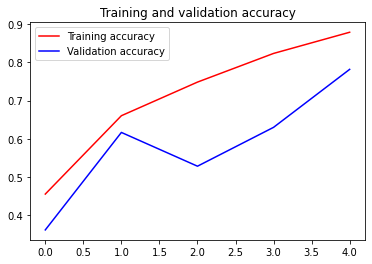

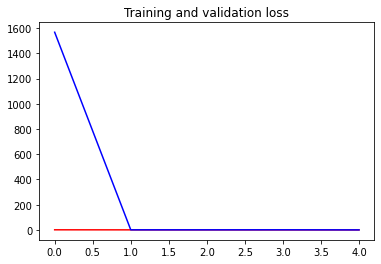

In [ ]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation accuracy')
plt. title('Training and validation accuracy')
plt. legend()
plt. figure()

plt.plot(epochs, loss, 'r', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation Loss')
plt.title('Training and validation loss')
plt. legend
plt.show()

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/drive/MyDrive/Project/model-01-0.360000.h5')
model_1 = Model(inputs=model_1.inputs,
                 outputs=model_1.outputs,
                 name= 'name_of_model_1')

model_2 = load_model('/content/drive/MyDrive/Project/model-04-0.525000.h5')
model_2 = Model(inputs=model_2.inputs,
                 outputs=model_2.outputs,
                 name= 'name_of_model_2')

model_3 = load_model('/content/drive/MyDrive/Project/model-05-0.781667.h5')
model_3 = Model(inputs=model_3.inputs,
                 outputs=model_3.outputs,
                 name= 'name_of_model_3')

models = [model_1, model_2, model_3]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name= 'ensemble')



In [ ]:
ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history=ensemble_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5, callbacks=[checkpoint])

Epoch 1/5
300/300 [==============================] - ETA: 0s - loss: 0.6601 - accuracy: 0.7471
Epoch 1: val_accuracy did not improve from 0.78167
300/300 [==============================] - 70s 232ms/step - loss: 0.6601 - accuracy: 0.7471 - val_loss: 1.9133 - val_accuracy: 0.2683
Epoch 2/5
300/300 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.7779
Epoch 2: val_accuracy did not improve from 0.78167
300/300 [==============================] - 73s 242ms/step - loss: 0.6709 - accuracy: 0.7779 - val_loss: 1.1694 - val_accuracy: 0.3900
Epoch 3/5
300/300 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.7479
Epoch 3: val_accuracy did not improve from 0.78167
300/300 [==============================] - 69s 230ms/step - loss: 0.6890 - accuracy: 0.7479 - val_loss: 0.7576 - val_accuracy: 0.7667
Epoch 4/5
300/300 [==============================] - ETA: 0s - loss: 0.7025 - accuracy: 0.7271
Epoch 4: val_accuracy did not improve from 0.78167
300/300 [=====